In [ ]:
# import thư viện
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#đọc bảng pageview
pageview = pd.read_excel('datatask2mindx.xlsx' , sheet_name='Sheet1')
pageview

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669,5778,6286,"Ki)D3jDmA,RIP68X",2020-01-10
1,/2020/1/070ttream0.518887735674677,360,370,403,GO4582ey<S!+k1VE,2020-01-10
2,/2020/1/070htream0.333307794468401,588,614,658,G.Kb^jz*soY!(-4Q,2020-01-16
3,/2020/1/100Grseys0.271522111052549,1284,1309,1385,Dr|vm[-5p~56Y\mk,2020-01-17
4,/2020/1/100[nside0.645837365801341,1846,1881,2025,Dr|vm[-5p~56Y\mk,2020-01-23
...,...,...,...,...,...,...
17884,/2020/12/yinfbowls0.6558670149224,130,133,142,HoXbja)qT:ESE8#,2020-12-01
17885,/2020/12/yosolease0.0455049365834417,315,326,365,"YoRQW7@*&5W+~4Y""",2020-12-03
17886,/2020/12/you^-info0.127669879156147,1420,1448,1616,"MouDd/fn,XEARhBp",2020-12-06
17887,/2020/12/youe-info0.729842478879044,484,488,510,"yo4}AUKGso=,?!DX",2020-12-04


# câu a: Website traffic có ảnh hưởng đến doanh thu không ?




Ở câu này, chúng em sẽ xét trend 2 giá trị pageview và sell price.

In [ ]:
pageview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Page URL                17889 non-null  object        
 1   users                   17889 non-null  int64         
 2   uniquePageviews         17889 non-null  int64         
 3   pageviews               17889 non-null  int64         
 4   Brand                   17889 non-null  object        
 5   Posted On (DD/MM/YYYY)  17889 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 838.7+ KB


In [ ]:
# Chuyển đổi cột "date" sang kiểu datetime 
pageview['Posted On (DD/MM/YYYY)'] = pd.to_datetime(pageview['Posted On (DD/MM/YYYY)'])

# Sử dụng phương thức dt để truy cập phương thức isocalendar() (tính số thứ tự tuần của ngày đó)
pageview['col1'] = pageview['Posted On (DD/MM/YYYY)'].dt.isocalendar().week

In [ ]:
#group by ngày để tính 
sum_pageview_day = pageview.groupby(by='Posted On (DD/MM/YYYY)',as_index=False)['pageviews'].sum()
sum_pageview_week = pageview.groupby(by='col1',as_index=False)['pageviews'].sum()

In [ ]:
pageview.head(5)

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),col1
0,/2020/1/032irview0.686128260621012,5669,5778,6286,"Ki)D3jDmA,RIP68X",2020-01-10,2
1,/2020/1/070ttream0.518887735674677,360,370,403,GO4582ey<S!+k1VE,2020-01-10,2
2,/2020/1/070htream0.333307794468401,588,614,658,G.Kb^jz*soY!(-4Q,2020-01-16,3
3,/2020/1/100Grseys0.271522111052549,1284,1309,1385,Dr|vm[-5p~56Y\mk,2020-01-17,3
4,/2020/1/100[nside0.645837365801341,1846,1881,2025,Dr|vm[-5p~56Y\mk,2020-01-23,4


In [ ]:
sum_pageview_day.head()

,Posted On (DD/MM/YYYY),pageviews
0,2020-01-01,70355
1,2020-01-02,122559
2,2020-01-03,71055
3,2020-01-04,15352
4,2020-01-05,51435


In [ ]:
sum_pageview_week.head()

,col1,pageviews
0,1,330756
1,2,599439
2,3,649960
3,4,714915
4,5,454759


In [ ]:
sum_pageview_week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   col1       50 non-null     UInt32
 1   pageviews  50 non-null     int64 
dtypes: UInt32(1), int64(1)
memory usage: 778.0 bytes


In [ ]:
sum_pageview_week.col1=sum_pageview_week.col1.astype('object')

Ở câu này, chúng em sẽ xét trend 2 giá trị pageview và sell price.

##visualize theo metric pageview để theo ngày và tuần

###visualize theo ngày

Text(0, 0.5, 'pageview')

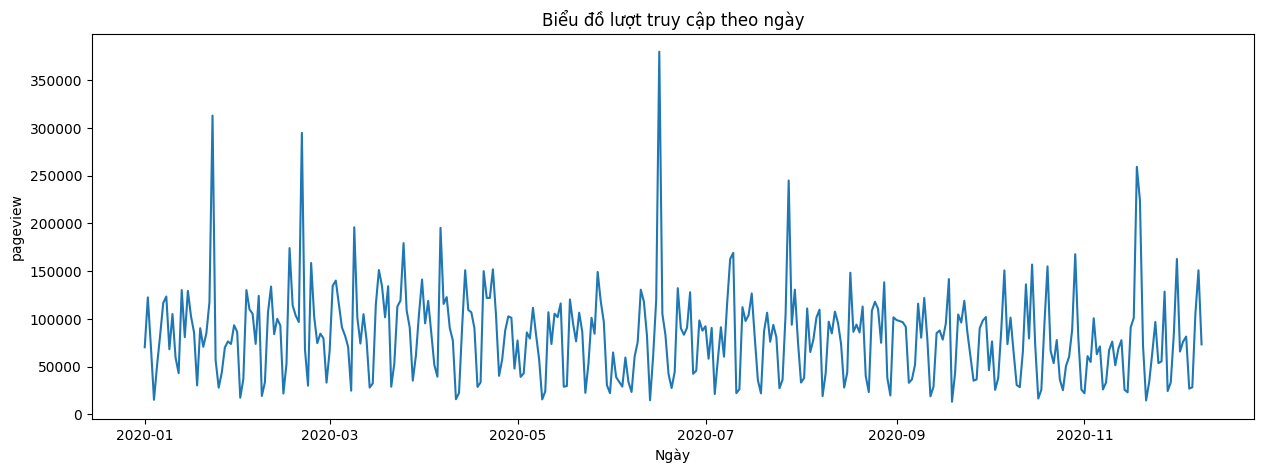

In [ ]:
# Tạo đối tượng hình ảnh mới và thiết lập kích thước
fig = plt.figure(figsize=(15, 5))
# Vẽ biểu đồ đường
plt.plot(sum_pageview_day['Posted On (DD/MM/YYYY)'], sum_pageview_day['pageviews'])
# Đặt tiêu đề và nhãn cho trục x, y
plt.title('Biểu đồ lượt truy cập theo ngày')
plt.xlabel('Ngày')
plt.ylabel('pageview')

###visualize theo tuần

Text(0, 0.5, 'pageview')

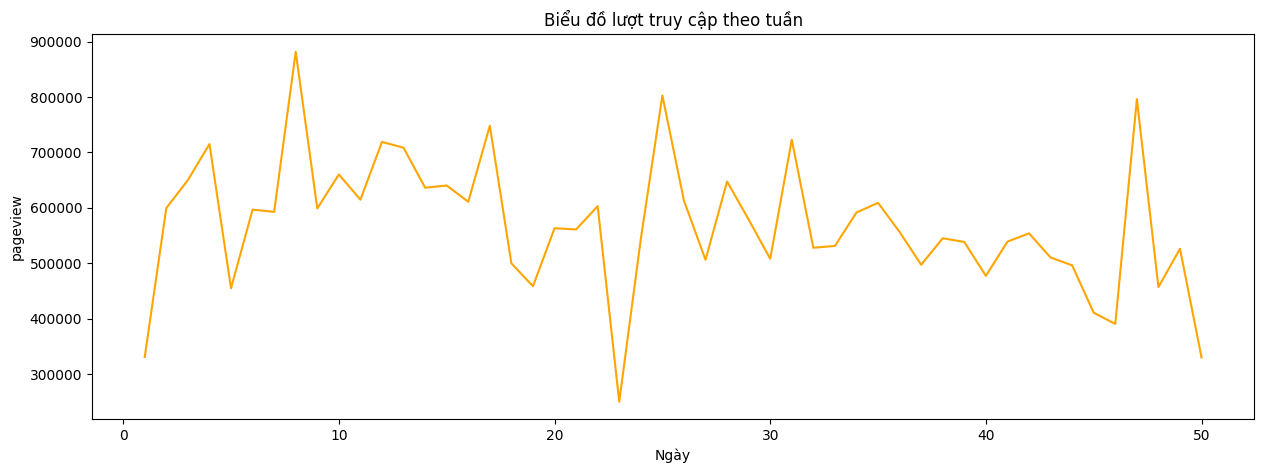

In [ ]:
fig = plt.figure(figsize=(15, 5))
# Vẽ biểu đồ đường
plt.plot(sum_pageview_week['col1'], sum_pageview_week['pageviews'],color='orange')
# Đặt tiêu đề và nhãn cho trục x, y
plt.title('Biểu đồ lượt truy cập theo tuần')
plt.xlabel('Ngày')
plt.ylabel('pageview')

In [ ]:
#import data 
transaction = pd.read_excel('datatask2mindx.xlsx' , sheet_name='Sheet4')
items = pd.read_excel('customers (UK).xlsx' , sheet_name='Items')

In [ ]:
# thực hiện merge 2 bảng transaction và items để tính được mỗi item ID có sell price bao nhiêu?
tran_mer_items = transaction.merge(items, on='ItemID')

In [ ]:
tran_mer_items.shape

(25213, 9)

In [ ]:
# Sử dụng phương thức dt để truy cập phương thức isocalendar()
tran_mer_items['col1'] = tran_mer_items['TransactionDate'].dt.isocalendar().week


In [ ]:
# group by để tính tổng 1 ngày có doanh thu bao nhiêu?
sum_SellPrice_day=tran_mer_items.groupby(by='TransactionDate',as_index=False)['SellPrice'].sum()
# group by để tính tổng có doanh thu theo tuần bao nhiêu?
sum_SellPrice_week=tran_mer_items.groupby(by='col1',as_index=False)['SellPrice'].sum()

In [ ]:
sum_SellPrice_day.head()

,TransactionDate,SellPrice
0,2020-01-01,55864
1,2020-01-02,55681
2,2020-01-03,67753
3,2020-01-04,64573
4,2020-01-05,61098


In [ ]:
sum_SellPrice_week.head()

,col1,SellPrice
0,1,304969
1,2,403671
2,3,438182
3,4,443455
4,5,194077


Text(0, 0.5, 'SellPrice')

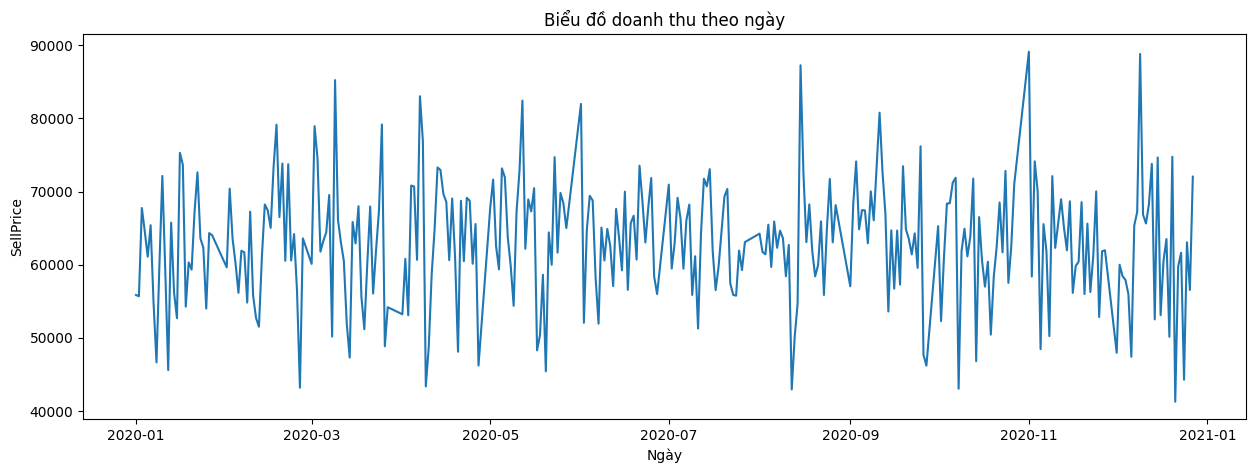

In [ ]:
# Tạo đối tượng hình ảnh mới và thiết lập kích thước
fig = plt.figure(figsize=(15, 5))
# Vẽ biểu đồ đường
plt.plot(sum_SellPrice_day['TransactionDate'], sum_SellPrice_day['SellPrice'])
# Đặt tiêu đề và nhãn cho trục x, y
plt.title('Biểu đồ doanh thu theo ngày')
plt.xlabel('Ngày')
plt.ylabel('SellPrice')

Text(0, 0.5, 'seller')

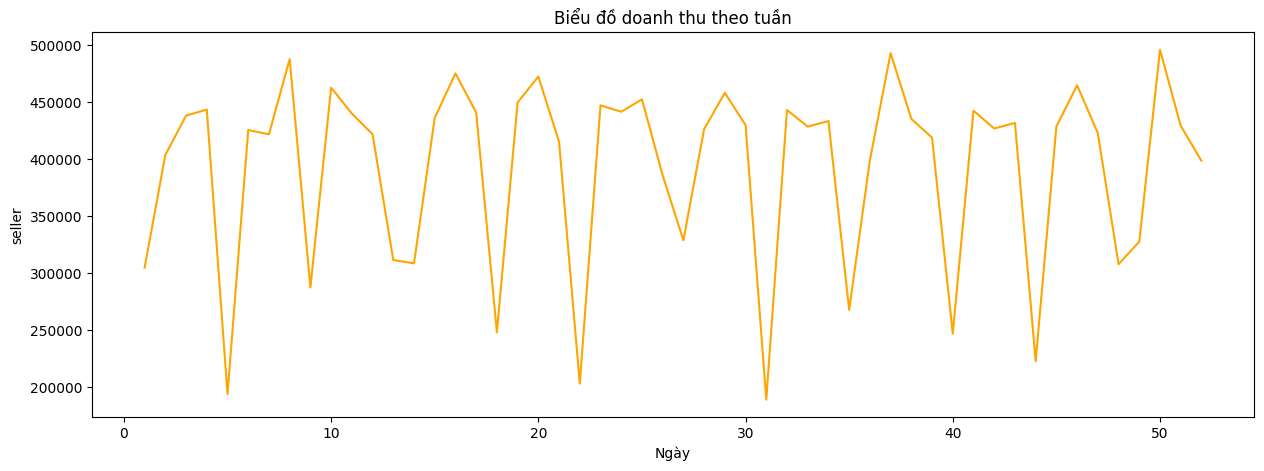

In [ ]:
# Tạo đối tượng hình ảnh mới và thiết lập kích thước
fig = plt.figure(figsize=(15, 5))
# Vẽ biểu đồ đường
plt.plot(sum_SellPrice_week['col1'], sum_SellPrice_week['SellPrice'], color = 'orange')
# Đặt tiêu đề và nhãn cho trục x, y
plt.title('Biểu đồ doanh thu theo tuần')
plt.xlabel('Ngày')
plt.ylabel('seller')

-> Từ các kết quả visualize trên ta thấy rằng trend tổng pageview và tổng doanh thu theo tuần và theo ngày của cửa hàng đều giống nhau

## Để chắc chắn hơn, ta sẽ tính hệ số tương quan giữa doanh thu và pageview 

In [ ]:
pageview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Page URL                17889 non-null  object        
 1   users                   17889 non-null  int64         
 2   uniquePageviews         17889 non-null  int64         
 3   pageviews               17889 non-null  int64         
 4   Brand                   17889 non-null  object        
 5   Posted On (DD/MM/YYYY)  17889 non-null  datetime64[ns]
 6   col1                    17889 non-null  UInt32        
dtypes: UInt32(1), datetime64[ns](1), int64(3), object(2)
memory usage: 926.0+ KB


In [ ]:
pageview.describe()

,users,uniquePageviews,pageviews,col1
count,17889.000000,17889.000000,17889.000000,17889.0
mean,1395.492929,1434.260104,1592.937224,24.777349
std,3352.453401,3490.932957,4412.134945,13.930845
min,0.000000,0.000000,0.000000,1.0
25%,329.000000,335.000000,359.000000,13.0
50%,624.000000,636.000000,684.000000,25.0
75%,1351.000000,1387.000000,1500.000000,37.0
max,215223.000000,221108.000000,232177.000000,50.0


In [ ]:
groupby_brand_pageview=pageview.groupby(by='Brand',as_index=False)['pageviews'].sum()
groupby_brand_customer=items.groupby(by='Brand',as_index=False)['SellPrice'].sum()
groupby_brand_customer = groupby_brand_pageview.merge(items, on='Brand')

In [ ]:
groupby_brand_customer

,Brand,pageviews,ItemID,Product,SellPrice,CostPrice
0,!lMifo~0~N65rM}2,102,12886,skyK-date0.237469692167954,905,433
1,#B_-`aDe`}CVt'!A,57719,1737,affOlease0.639774265568529,1126,273
2,#B_-`aDe`}CVt'!A,57719,3081,vauK-info0.958920102803307,339,213
3,#B_-`aDe`}CVt'!A,57719,10470,how[-safe0.151301895990878,913,47
4,#B_-`aDe`}CVt'!A,57719,11491,18-`lease0.952310074301681,478,285
...,...,...,...,...,...,...
15929,"ze\yQP9Ju,s(O|>]",366,13161,zelKvideo0.979832131901721,1377,380
15930,Ét2:1))2]qB2`9;^,1914,2079,etujation0.0817298363167827,1233,363
15931,Ét2:1))2]qB2`9;^,1914,16747,etua-baby0.472156023137423,524,378
15932,Ét2:1))2]qB2`9;^,1914,16748,etuqt-day0.117221119496646,1167,321


In [ ]:
groupby_brand_merge=groupby_brand_customer.groupby(by='Brand',as_index=False)[['ItemID','SellPrice','pageviews']].sum()
groupby_brand_merge

,Brand,ItemID,SellPrice,pageviews
0,!lMifo~0~N65rM}2,12886,905,102
1,#B_-`aDe`}CVt'!A,1025550,59603,4790677
2,#F5)UtM8Y&|njdBq,6912,514,470
3,$UYTzcYl\*I(\/SZ,11152,636,1602
4,"(Ah/=SM""p^hD')i?",14863,990,509
...,...,...,...,...
2819,wi9@xU3I$YhPw^~T,32679,3544,5709
2820,"yo4}AUKGso=,?!DX",117682,11082,296715
2821,"ze\yQP9Ju,s(O|>]",54580,5286,2196
2822,Ét2:1))2]qB2`9;^,35574,2924,5742


In [ ]:
groupby_brand_merge.corr()

<ipython-input-103-c91901854604>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  groupby_brand_merge.corr()


,ItemID,SellPrice,pageviews
ItemID,1.000000,0.996588,0.806866
SellPrice,0.996588,1.000000,0.824757
pageviews,0.806866,0.824757,1.000000


In [ ]:
pageview.corr()

<ipython-input-104-0c49fa3e2c9a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pageview.corr()


,users,uniquePageviews,pageviews,col1
users,1.000000,0.998199,0.952604,-0.015809
uniquePageviews,0.998199,1.000000,0.961924,-0.015081
pageviews,0.952604,0.961924,1.000000,-0.007119
col1,-0.015809,-0.015081,-0.007119,1.000000


VẼ BIỂU ĐỒ TƯƠNG QUAN SCATTER PLOT

Ta đã tính được hệ số tương quan giữa pageview và doanh thu là 0.82
Hơn nữa các chỉ số users uniquepageviews cũng tương quan lên đến 0.95
Kết luận webtraffic có liên quan đến doanh thu của cửa hàng

câu b: Sản phẩm nào mang lại pageviews và doanh thu 

Từ câu a ta kết luận web traffic có liên quan đến doanh thu vậy thì đối với câu b, để tìm sản phẩm nào mang lại page view và doanh thu, ta sẽ cần tìm top sản phẩm mang lại doanh thu lớn rồi sản phẩm đó cũng sẽ mang lại pageviews
=> Từ đó để tăng doanh thu cho công ty A ta cần đưa ra các biện pháp để tăng lượt truy cập cho doanh nghiệp như: Tối ưu hóa SEO, tạo ra các nội dung chất lượng hơn thu hút khách hàng, chăm chút vào content,...

# Câu b

In [ ]:
transaction


,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0,0,352,2020-03-21,In Store
1,0,0,3433,2020-07-14,In Store
2,0,0,11162,2020-08-09,In Store
3,0,0,13011,2020-12-07,In Store
4,0,0,13885,2020-11-08,In Store
...,...,...,...,...,...
25208,8361,769,10053,2020-12-19,In Store
25209,8361,769,13162,2020-02-04,In Store
25210,8362,769,8727,2020-11-18,In Store
25211,8362,769,13065,2020-05-11,In Store


In [ ]:
items

,ItemID,Product,Brand,SellPrice,CostPrice
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392
...,...,...,...,...,...
17884,17885,zarzmodel0.705343660670698,"Zah<@kD,N[_x007f_Vo]vf",202,42
17885,17886,zelQailer0.599088919243258,Nia_TfHUVDtT>6-s,463,131
17886,17887,zenyation0.980382120595891,Chbm3nL;wgcU<S(y,688,200
17887,17888,zenvition0.646980947183814,"Ac8IJsKH,4xtY.Tk",157,63


In [ ]:
# sales = items.merge(transaction, on='ItemID').groupby(by='Brand',as_index=False)[['ItemID','Brand','SellPrice','CostPrice']].sum()
# sales

In [ ]:
# sales_channel = sales.merge(transaction, on='ItemID')[['Brand','SellPrice','CostPrice','Channel']]
# sales_channel

In [ ]:
# sales_channel_page_view = sales_channel

In [ ]:
# sales_channel_page_view

In [ ]:
# sắp xếp doanh thu theo thứ tự nhỏ dần
sorted_revenue_desc = groupby_brand_merge.sort_values('SellPrice', ascending=False)
sorted_view_desc = groupby_brand_merge.sort_values('pageviews', ascending=False)


In [ ]:
# sales_channel_desc = sales_channel.sort_values('SellPrice', ascending=False).head(10)
# sales_channel_desc

In [ ]:
sorted_revenue_desc_10 = sorted_revenue_desc.head(10)
sorted_revenue_desc_10

,Brand,ItemID,SellPrice,pageviews
1752,NiPea$n|Eu@<@>'L,10337755,991403,4340456792
78,"Ac8IJsKH,4xtY.Tk",5442047,490916,592749292
2715,ad(;%f6iD'}9EHD[,3489167,352971,496781550
2766,"muy(D#""d02`vwt_^",3254022,251567,36726544
1737,Nes[8ukT8KBR8yVs,2081135,194853,108871431
189,Ap!FulqmT[82a2/E,1935634,180005,133897968
137,Al_w1b7Rgo1[d5(t,1941821,168872,30352074
816,Exa~e4sZi*|fpD<^,1732199,167905,12964610
1657,"MouDd/fn,XEARhBp",1771696,160248,59527800
561,CoGXb3uT&^.NE9Qn,1333194,141921,42611910


In [ ]:
sorted_view_desc_10 = sorted_view_desc.head(10)
sorted_view_desc_10 

,Brand,ItemID,SellPrice,pageviews
1752,NiPea$n|Eu@<@>'L,10337755,991403,4340456792
78,"Ac8IJsKH,4xtY.Tk",5442047,490916,592749292
2715,ad(;%f6iD'}9EHD[,3489167,352971,496781550
189,Ap!FulqmT[82a2/E,1935634,180005,133897968
1737,Nes[8ukT8KBR8yVs,2081135,194853,108871431
1657,"MouDd/fn,XEARhBp",1771696,160248,59527800
2333,SuUM.u7T\&9RNdZ6,860170,68062,49848750
561,CoGXb3uT&^.NE9Qn,1333194,141921,42611910
1285,Ka53T<K8f.2M94Yd,1014511,83464,38063645
1757,Nia_TfHUVDtT>6-s,1071330,88791,36956537


In [ ]:
# sorted_data_asc = groupby_brand_merge.sort_values('SellPrice', ascending=True)

In [ ]:
# top_10_data_desc = sorted_data_desc.head(10)
# top_10_data_desc

Từ 2 bảng trên ta thấy dc top 10 hãng sản phẩm pageview và top 10 doanh thu 
Tuy nhiên ta cũng có thể kết luận được hãng sản phẩm mang lại cả về page view và doanh thu đó là NiPea$n|Eu@<@>'L, Ac8IJsKH,4xtY.Tk, ad(;%f6iD'}9EHD[,Ap!FulqmT[82a2/E,Nes[8ukT8KBR8yVs,	CoGXb3uT&^.NE9Qn

In [ ]:
# # Vẽ biểu đồ cột cho 10 sản phẩm đó
# plt.bar(top_10_data_desc['Brand'], top_10_data_desc['SellPrice'])
# # Đặt tiêu đề và nhãn cho trục x, y
# plt.title('Top 10 sản phẩm có doanh thu cao nhất ')
# plt.xlabel('Sản phẩm')
# plt.ylabel('Doanh thu')
# # Hiển thị biểu đồ cho sản phẩm đang xét
# plt.show()

In [ ]:
pageview[pageview['pageviews']=='datetime.datetime']

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY),col1


# Câu C



### Table customer

In [ ]:
customer = pd.read_excel('customers (UK).xlsx' , sheet_name='customer info')
customer

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,NaN,1965-07-25,Y
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          770 non-null    int64         
 1   FirstName   770 non-null    object        
 2   LastName    770 non-null    object        
 3   Country     770 non-null    object        
 4   DateJoined  770 non-null    datetime64[ns]
 5   Gender      519 non-null    object        
 6   Birthday    770 non-null    datetime64[ns]
 7   Newsletter  770 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 48.2+ KB


In [ ]:
customer['ID'] = customer['ID'].astype('object')

In [ ]:
customer.describe()

<ipython-input-122-0c5fd1a9e819>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customer.describe()
<ipython-input-122-0c5fd1a9e819>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  customer.describe()


,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
count,770.0,770,770,770,770,519,770,770
unique,770.0,638,491,4,172,2,761,2
top,0.0,Vince0.78241795130866,Tan0.662463855720801,GER - Germany,2016-09-05 00:00:00,F,2001-11-14 00:00:00,Y
freq,1.0,9,35,321,168,262,2,413
first,NaN,NaN,NaN,NaN,2015-03-02 00:00:00,NaN,1965-01-20 00:00:00,NaN
last,NaN,NaN,NaN,NaN,2016-09-15 00:00:00,NaN,2010-12-01 00:00:00,NaN


In [ ]:
customer['Gender'] = customer['Gender'].fillna('Not Identify')

In [ ]:
customer

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,Not Identify,1968-02-03,N
1,1,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
...,...,...,...,...,...,...,...,...
765,765,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N
766,766,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,Not Identify,1965-07-25,Y
767,767,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y
768,768,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y


###table transaction

In [ ]:
transaction = pd.read_excel('datatask2mindx.xlsx' , sheet_name='Sheet4')
transaction

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0,0,352,2020-03-21,In Store
1,0,0,3433,2020-07-14,In Store
2,0,0,11162,2020-08-09,In Store
3,0,0,13011,2020-12-07,In Store
4,0,0,13885,2020-11-08,In Store
...,...,...,...,...,...
25208,8361,769,10053,2020-12-19,In Store
25209,8361,769,13162,2020-02-04,In Store
25210,8362,769,8727,2020-11-18,In Store
25211,8362,769,13065,2020-05-11,In Store


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25213 entries, 0 to 25212
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          25213 non-null  int64         
 1   CustomerID       25213 non-null  int64         
 2   ItemID           25213 non-null  int64         
 3   TransactionDate  25213 non-null  datetime64[ns]
 4   Channel          25213 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 985.0+ KB


In [ ]:
transaction['CustomerID'] = transaction['CustomerID'].astype('object')

In [ ]:
transaction['ItemID'] = transaction['ItemID'].astype('object')

###table items

In [ ]:
items = pd.read_excel('customers (UK).xlsx' , sheet_name='Items')
items

,ItemID,Product,Brand,SellPrice,CostPrice
0,1,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943,359
1,2,070ttream0.518887735674677,GO4582ey<S!+k1VE,717,207
2,3,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739,199
3,4,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532,262
4,5,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593,392
...,...,...,...,...,...
17884,17885,zarzmodel0.705343660670698,"Zah<@kD,N[_x007f_Vo]vf",202,42
17885,17886,zelQailer0.599088919243258,Nia_TfHUVDtT>6-s,463,131
17886,17887,zenyation0.980382120595891,Chbm3nL;wgcU<S(y,688,200
17887,17888,zenvition0.646980947183814,"Ac8IJsKH,4xtY.Tk",157,63


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17889 entries, 0 to 17888
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ItemID     17889 non-null  int64 
 1   Product    17889 non-null  object
 2   Brand      17889 non-null  object
 3   SellPrice  17889 non-null  int64 
 4   CostPrice  17889 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 698.9+ KB


In [ ]:
items.describe()

,ItemID,SellPrice,CostPrice
count,17889.000000,17889.000000,17889.000000
mean,8945.000000,808.622673,267.933982
std,5164.253818,349.004316,132.468264
min,1.000000,43.000000,40.000000
25%,4473.000000,525.000000,153.000000
50%,8945.000000,801.000000,267.000000
75%,13417.000000,1103.000000,382.000000
max,17889.000000,1964.000000,500.000000


In [ ]:
items['Brand'].duplicated().sum()

14647

### Câu 3: Tính RFM

In [ ]:
recency_df = transaction.groupby(by='CustomerID',as_index=False)['TransactionDate'].max()
recency_df.columns = ['CustomerID', 'LastPurchaseDate']
recent_date = recency_df['LastPurchaseDate'].max()
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (recent_date - x).days)

recency_df

,CustomerID,LastPurchaseDate,Recency
0,0,2020-12-23,4
1,1,2020-12-15,12
2,2,2020-12-11,16
3,3,2020-12-20,7
4,4,2020-12-22,5
...,...,...,...
765,765,2020-12-05,22
766,766,2020-07-07,173
767,767,2020-12-26,1
768,768,2020-12-27,0


In [ ]:
frequency_df = transaction.drop_duplicates().groupby(by=['CustomerID'], as_index=False)['TransactionDate'].count()
frequency_df.columns = ['CustomerID', 'Frequency']
frequency_df

,CustomerID,Frequency
0,0,45
1,1,39
2,2,21
3,3,19
4,4,48
...,...,...
765,765,38
766,766,7
767,767,57
768,768,49


In [ ]:
monetary = transaction.merge(items, how='left', on='ItemID')
monetary


,OrderID,CustomerID,ItemID,TransactionDate,Channel,Product,Brand,SellPrice,CostPrice
0,0,0,352,2020-03-21,In Store,chrUrumor0.784919078952733,"MouDd/fn,XEARhBp",735,426
1,0,0,3433,2020-07-14,In Store,corGvideo0.268391324982493,"muy(D#""d02`vwt_^",963,491
2,0,0,11162,2020-08-09,In Store,sevCrtage0.255053382396546,Wem+H2Pk8Jfbb*[D,582,391
3,0,0,13011,2020-12-07,In Store,theB-info0.46598133500784,ThcmX`v~{K~t{Jeh,339,135
4,0,0,13885,2020-11-08,In Store,kanyained0.673922507607742,Ka53T<K8f.2M94Yd,1369,231
...,...,...,...,...,...,...,...,...,...
25208,8361,769,10053,2020-12-19,In Store,belUition0.249973899862794,"Ac8IJsKH,4xtY.Tk",1077,242
25209,8361,769,13162,2020-02-04,In Store,zenpkawae0.226346388966917,"Ince!T,;eW/4o\eg",1140,253
25210,8362,769,8727,2020-11-18,In Store,g-snation0.0993461911005428,WaQqK)2JxI(=dac=,205,66
25211,8362,769,13065,2020-05-11,In Store,undflease0.156012002899051,"Uny~Y,~<rTC^J6py",1012,272


In [ ]:
monetary_df = monetary.groupby(by='CustomerID',as_index=False)['SellPrice'].sum()
monetary_df

,CustomerID,SellPrice
0,0,32997
1,1,34948
2,2,17879
3,3,14603
4,4,37029
...,...,...
765,765,29538
766,766,5331
767,767,45470
768,768,35462


In [ ]:
monetary_df.columns = ['CustomerID', 'Monetary']

monetary_df

,CustomerID,Monetary
0,0,32997
1,1,34948
2,2,17879
3,3,14603
4,4,37029
...,...,...
765,765,29538
766,766,5331
767,767,45470
768,768,35462


In [ ]:
rf_df = recency_df.merge(frequency_df, on='CustomerID')
rfm_df = rf_df.merge(monetary_df, on='CustomerID')

rfm_df


,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,0,2020-12-23,4,45,32997
1,1,2020-12-15,12,39,34948
2,2,2020-12-11,16,21,17879
3,3,2020-12-20,7,19,14603
4,4,2020-12-22,5,48,37029
...,...,...,...,...,...
765,765,2020-12-05,22,38,29538
766,766,2020-07-07,173,7,5331
767,767,2020-12-26,1,57,45470
768,768,2020-12-27,0,49,35462


In [ ]:
rfm_df['R_rank'] = rf_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rf_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank','M_rank'], inplace=True)

rfm_df

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0,2020-12-23,4,45,32997,69.684499,73.181818,73.181818
1,1,2020-12-15,12,39,34948,36.831276,62.012987,62.012987
2,2,2020-12-11,16,21,17879,27.091907,28.831169,28.831169
3,3,2020-12-20,7,19,14603,55.349794,24.805195,24.805195
4,4,2020-12-22,5,48,37029,63.923182,79.025974,79.025974
...,...,...,...,...,...,...,...,...
765,765,2020-12-05,22,38,29538,18.175583,59.675325,59.675325
766,766,2020-07-07,173,7,5331,0.548697,4.935065,4.935065
767,767,2020-12-26,1,57,45470,90.397805,92.337662,92.337662
768,768,2020-12-27,0,49,35462,100.000000,80.649351,80.649351


In [ ]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

rfm_rank_df = rfm_df.drop(columns=
                          ['Recency', 'Frequency','Monetary', 'R_rank_norm', 'F_rank_norm','M_rank_norm'])

rfm_rank_df['Customer Rank'] = pd.cut(rfm_rank_df['RFM_Score'], bins=[0, 2,4  ,float('inf')],
                                      labels=['Lost', 'Active','Close'])

rfm_rank_df

,CustomerID,LastPurchaseDate,RFM_Score,Customer Rank
0,0,2020-12-23,3.63,Active
1,1,2020-12-15,2.91,Active
2,2,2020-12-11,1.43,Lost
3,3,2020-12-20,1.47,Lost
4,4,2020-12-22,3.84,Active
...,...,...,...,...
765,765,2020-12-05,2.67,Active
766,766,2020-07-07,0.21,Lost
767,767,2020-12-26,4.60,Close
768,768,2020-12-27,4.18,Close


<Axes: >

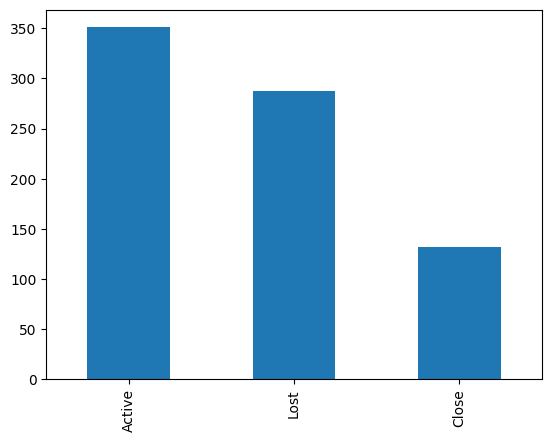

In [ ]:
rfm_rank_df['Customer Rank'].value_counts().plot(kind='bar')


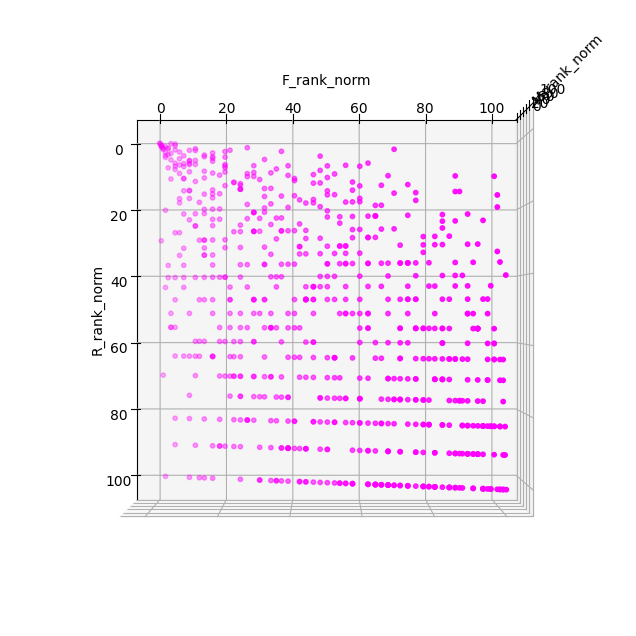

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = rfm_df['R_rank_norm']
y = rfm_df['F_rank_norm']
z = rfm_df['M_rank_norm']

ax.scatter(x, y, z, c='magenta' ,s=10)

ax.set_xlabel('R_rank_norm')
ax.set_ylabel('F_rank_norm')
ax.set_zlabel('M_rank_norm')

ax.view_init(elev=90, azim=0)

plt.show()


## K-mean

### xử lí dữ liệu

In [ ]:
data=rfm_df[['R_rank_norm','F_rank_norm','M_rank_norm']]

In [ ]:
data.describe()

,R_rank_norm,F_rank_norm,M_rank_norm
count,770.000000,770.000000,770.000000
mean,52.880610,50.065208,50.065208
std,30.464898,28.881034,28.881034
min,0.140000,0.190000,0.190000
25%,27.090000,24.810000,24.810000
50%,53.260000,50.390000,50.390000
75%,82.510000,75.390000,75.390000
max,100.000000,100.000000,100.000000


<Axes: xlabel='M_rank_norm'>

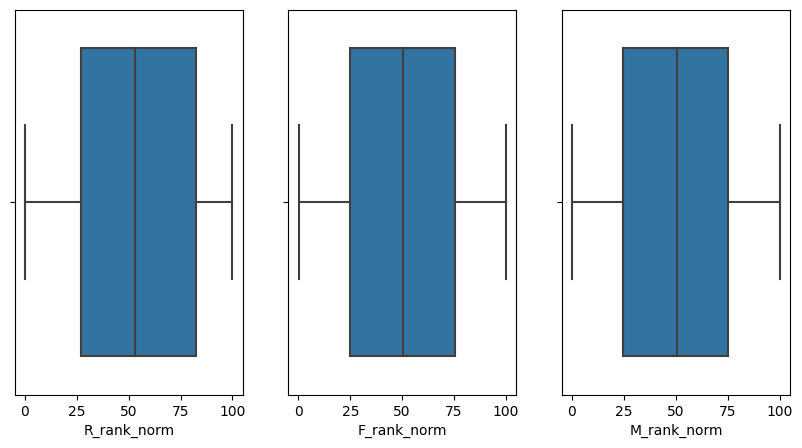

In [ ]:
import seaborn as sns
fig, axs = plt.subplots(ncols=3, figsize=(10, 5))
sns.boxplot(data=data, x="R_rank_norm", ax=axs[0])
sns.boxplot(data=data, x="F_rank_norm", ax=axs[1])
sns.boxplot(data=data, x="M_rank_norm", ax=axs[2])

### tìm số phân lớp hợp lý

tìm điểm elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

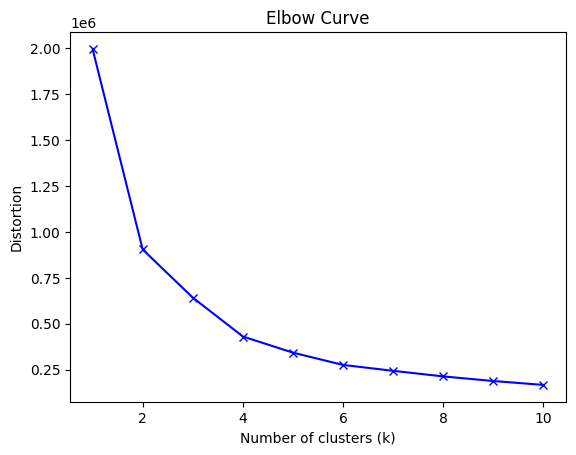

In [ ]:
from sklearn.cluster import KMeans


# Define range of k values
k_max=10
k_values = range(1, k_max + 1)

# Run K-means for each k and calculate distortion
distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    distortion = kmeans.inertia_
    distortions.append(distortion)

# Plot elbow curve
plt.plot(k_values, distortions, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Curve')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

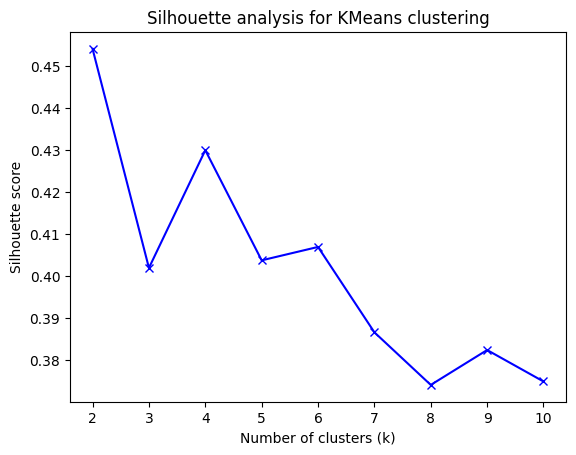

The best number of clusters is: 2


In [ ]:
from sklearn.metrics import silhouette_score


# define the range of k values to test
k_max = 10
k_range = range(2, k_max+1)

# calculate the Silhouette score for each k
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    labels = kmeans.predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# plot the Silhouette score for each k
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis for KMeans clustering')
plt.show()

# find the k with the highest Silhouette score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f"The best number of clusters is: {best_k}")

### phân lớp khách hàng

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


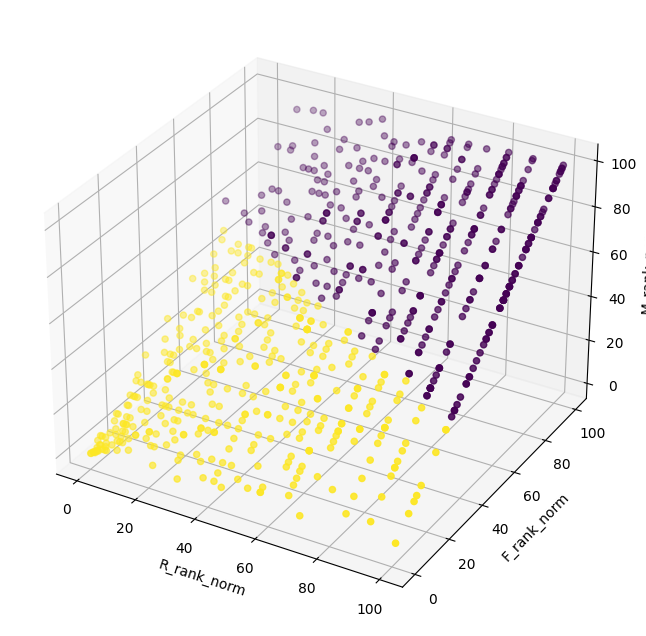

In [ ]:

# Initialize K-means with the selected number of clusters
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit K-means to the data
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters in 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

x = data['R_rank_norm']
y = data['F_rank_norm']
z = data['M_rank_norm']

ax.scatter(x, y, z, c=labels, cmap='viridis', s=20)

ax.set_xlabel('R_rank_norm')
ax.set_ylabel('F_rank_norm')
ax.set_zlabel('M_rank_norm')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


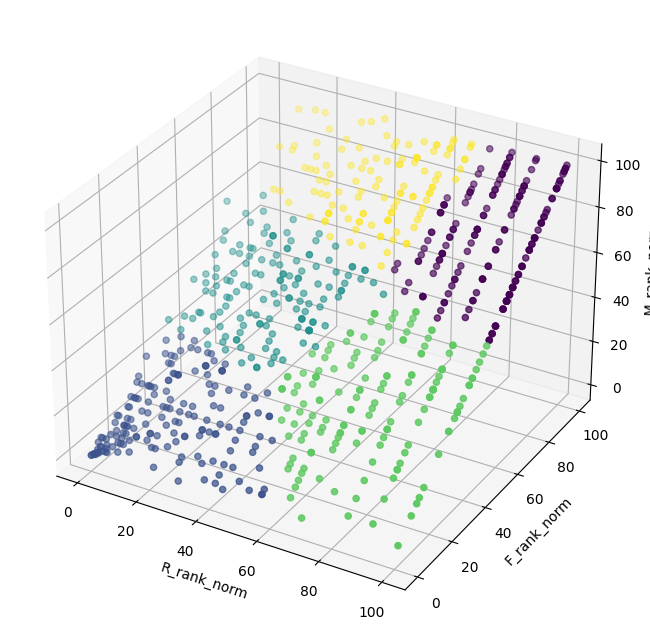

In [ ]:
# Initialize K-means with the selected number of clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit K-means to the data
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters in 3D plot
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

x = data['R_rank_norm']
y = data['F_rank_norm']
z = data['M_rank_norm']

ax.scatter(x, y, z, c=labels, cmap='viridis', s=20)

ax.set_xlabel('R_rank_norm')
ax.set_ylabel('F_rank_norm')
ax.set_zlabel('M_rank_norm')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


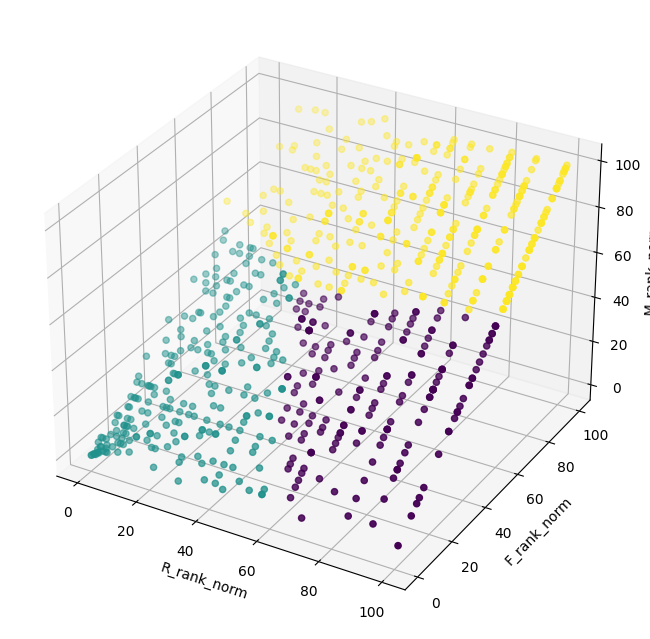

In [ ]:
# Initialize K-means with the selected number of clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit K-means to the data
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Visualize the clusters in 3D plot
fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(111, projection='3d')

x = data['R_rank_norm']
y = data['F_rank_norm']
z = data['M_rank_norm']

ax.scatter(x, y, z, c=labels, cmap='viridis', s=20)

ax.set_xlabel('R_rank_norm')
ax.set_ylabel('F_rank_norm')
ax.set_zlabel('M_rank_norm')

plt.show()